# Abalone

### Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import math

### Get Data

In [2]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(target_url, header = None, prefix = "V")
abalone.columns = ["sex", "length", "diameter", "height", "whole weight", "shucked weight", "viscera weight", "shell weight", "rings"]

### First look at the data

In [3]:
summary = abalone.describe()
print(abalone.head())
print(summary)

  sex  length  diameter  height  whole weight  shucked weight  viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
            length     diameter       height  whole weight  shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0

### Quartiles boxplot

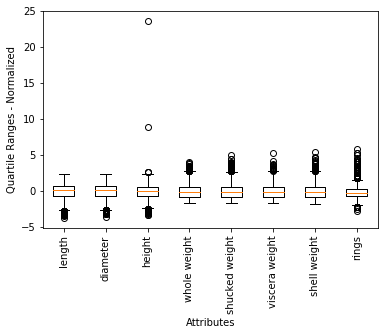

In [4]:
abaloneNormalized = abalone.copy()
ncols = len(abaloneNormalized.columns)

for i in range(ncols - 1):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    
    abaloneNormalized.iloc[:, i + 1:(i + 2)] = (abaloneNormalized.iloc[:, i + 1:(i + 2)] - mean) /sd #leave out categorial column "sex"
    
array = abaloneNormalized.values[:, 1:] #leave out categorial column "sex"
plot.boxplot(array)
plot.xticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'vertical')
plot.xlabel("Attributes")
plot.ylabel("Quartile Ranges - Normalized")
plot.show()

In [14]:
print(nrows)
print(targetCol)
print(meanTarget)
print(sdTarget)
print(nDataCol)

4177
8
9.933684462532918
3.2241690320681284
8


### Parallel coordinates plot (unnormalized vs normalized)

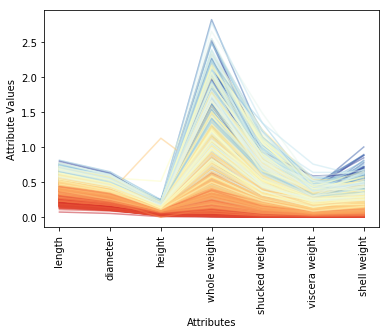

In [15]:
nrows = len(abalone.index)
targetCol = len(abalone.columns) - 1

meanTarget = summary.iloc[1, targetCol - 1]
sdTarget = summary.iloc[2, targetCol - 1]
nDataCol = len(abalone.columns) - 1

for i in range(nrows):
    dataRow = abalone.iloc[i, 1:nDataCol]
    normTarget = (abalone.iloc[i, targetCol] - meanTarget) / sdTarget
    labelColor = 1.0 / (1.0 + math.exp(-normTarget))
    dataRow.plot(color = plot.cm.RdYlBu(labelColor), alpha = 0.5)
    
plot.xlabel("Attributes")
plot.ylabel("Attribute Values")
plot.xticks(list(range(0, len(summary.columns) - 1)), list(summary.columns)[:-1], rotation = 'vertical')
plot.show()

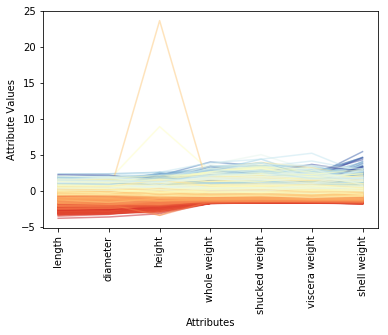

In [17]:
for i in range(nrows):
    dataRow = abaloneNormalized.iloc[i, 1:nDataCol]
    normTarget = abaloneNormalized.iloc[i, targetCol]
    labelColor = 1.0 / (1.0 + math.exp(-normTarget))
    dataRow.plot(color = plot.cm.RdYlBu(labelColor), alpha = 0.5)
    
plot.xlabel("Attributes")
plot.ylabel("Attribute Values")
plot.xticks(list(range(0, len(summary.columns) - 1)), list(summary.columns)[:-1], rotation = 'vertical')
plot.show()

### Correlation heat map

In [20]:
corMat = pd.DataFrame(abalone.iloc[:, 1:].corr())
print(corMat)

                  length  diameter    height  whole weight  shucked weight  \
length          1.000000  0.986812  0.827554      0.925261        0.897914   
diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
height          0.827554  0.833684  1.000000      0.819221        0.774972   
whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                viscera weight  shell weight     rings  
length                0.903018      0.897706  0.556720  
diameter              0.899724      0.905330  0.574660  
height                0.798319      0.817338  0.557467  
whole weight          0.966375      0.955355  0.540390  
shucked weig

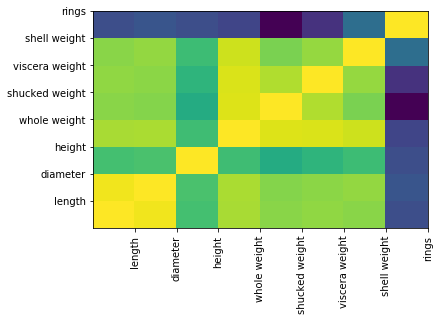

In [21]:
plot.pcolor(corMat)
plot.xticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'vertical')
plot.yticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'horizontal')
plot.show()